# Menyiapkan *Library*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Menyiapkan Data

In [2]:
data = pd.read_csv("diabetes.csv")

print(f"Ukuran dataset: {data.shape}")
data.head()

Ukuran dataset: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
for col in data.columns:
    print('{} : {} data unik'.format(col, len(data[col].value_counts())))

Pregnancies : 17 data unik
Glucose : 136 data unik
BloodPressure : 47 data unik
SkinThickness : 51 data unik
Insulin : 186 data unik
BMI : 248 data unik
DiabetesPedigreeFunction : 517 data unik
Age : 52 data unik
Outcome : 2 data unik


Analisis data:
1. Dataset memiliki 9 kolom atau atribut dan 768 baris atau *instance*. Atribut target yaitu "*Outcome*", dengan 8 atribut lainnya akan membantu pada prediksi diabetes.
2. Semua data bertipe numerik dan sebagian besar berupa bilangan bulat. Dan jika diperhatikan tidak ada *missing values* pada data.
3. Pada tabel deskripsi data terlihat banyak kolom yang nilai minimumnya 0,  pada faktanya tidak ada manusia yang memiliki insulin atau tekanan darah atau BMI pada nilai 0. Jadi nilai-nilai tersebut akan diganti dengan nilai yang lebih sesuai.

## *Cleaning* Data 

*Instance* dengan nilai 0 pada atribut *Glucose, BloodPressure, SkinThickness, Insulin, BMI* akan diganti dengan nilai yang lebih sesuai. Yaitu dengan menggunakan nilai acak di sekitar nilai rata-rata.

In [7]:
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
    mean = data[data[col] != 0][col].mean()
    std = data[data[col] != 0][col].std()

    values = data[col].values

    np.random.seed(23)

    for i, val in enumerate(values):
        if val == 0:
            values[i] = mean + std * (np.random.rand() * 2 - 1) * 1.5
    data[col] = pd.Series(values).astype(data[col].dtype)

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.71224,72.371094,28.899740,152.257812,32.444247,0.471876,33.240885,0.348958
std,3.369578,30.50666,12.338830,10.076842,111.340422,6.908695,0.331329,11.760232,0.476951
min,0.000000,44.00000,24.000000,7.000000,-22.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.00000,64.000000,21.000000,71.750000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.00000,72.000000,29.000000,130.500000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.00000,80.000000,36.000000,209.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.00000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# *Exploratory Data Analysis* (EDA)

## Distribusi Data 

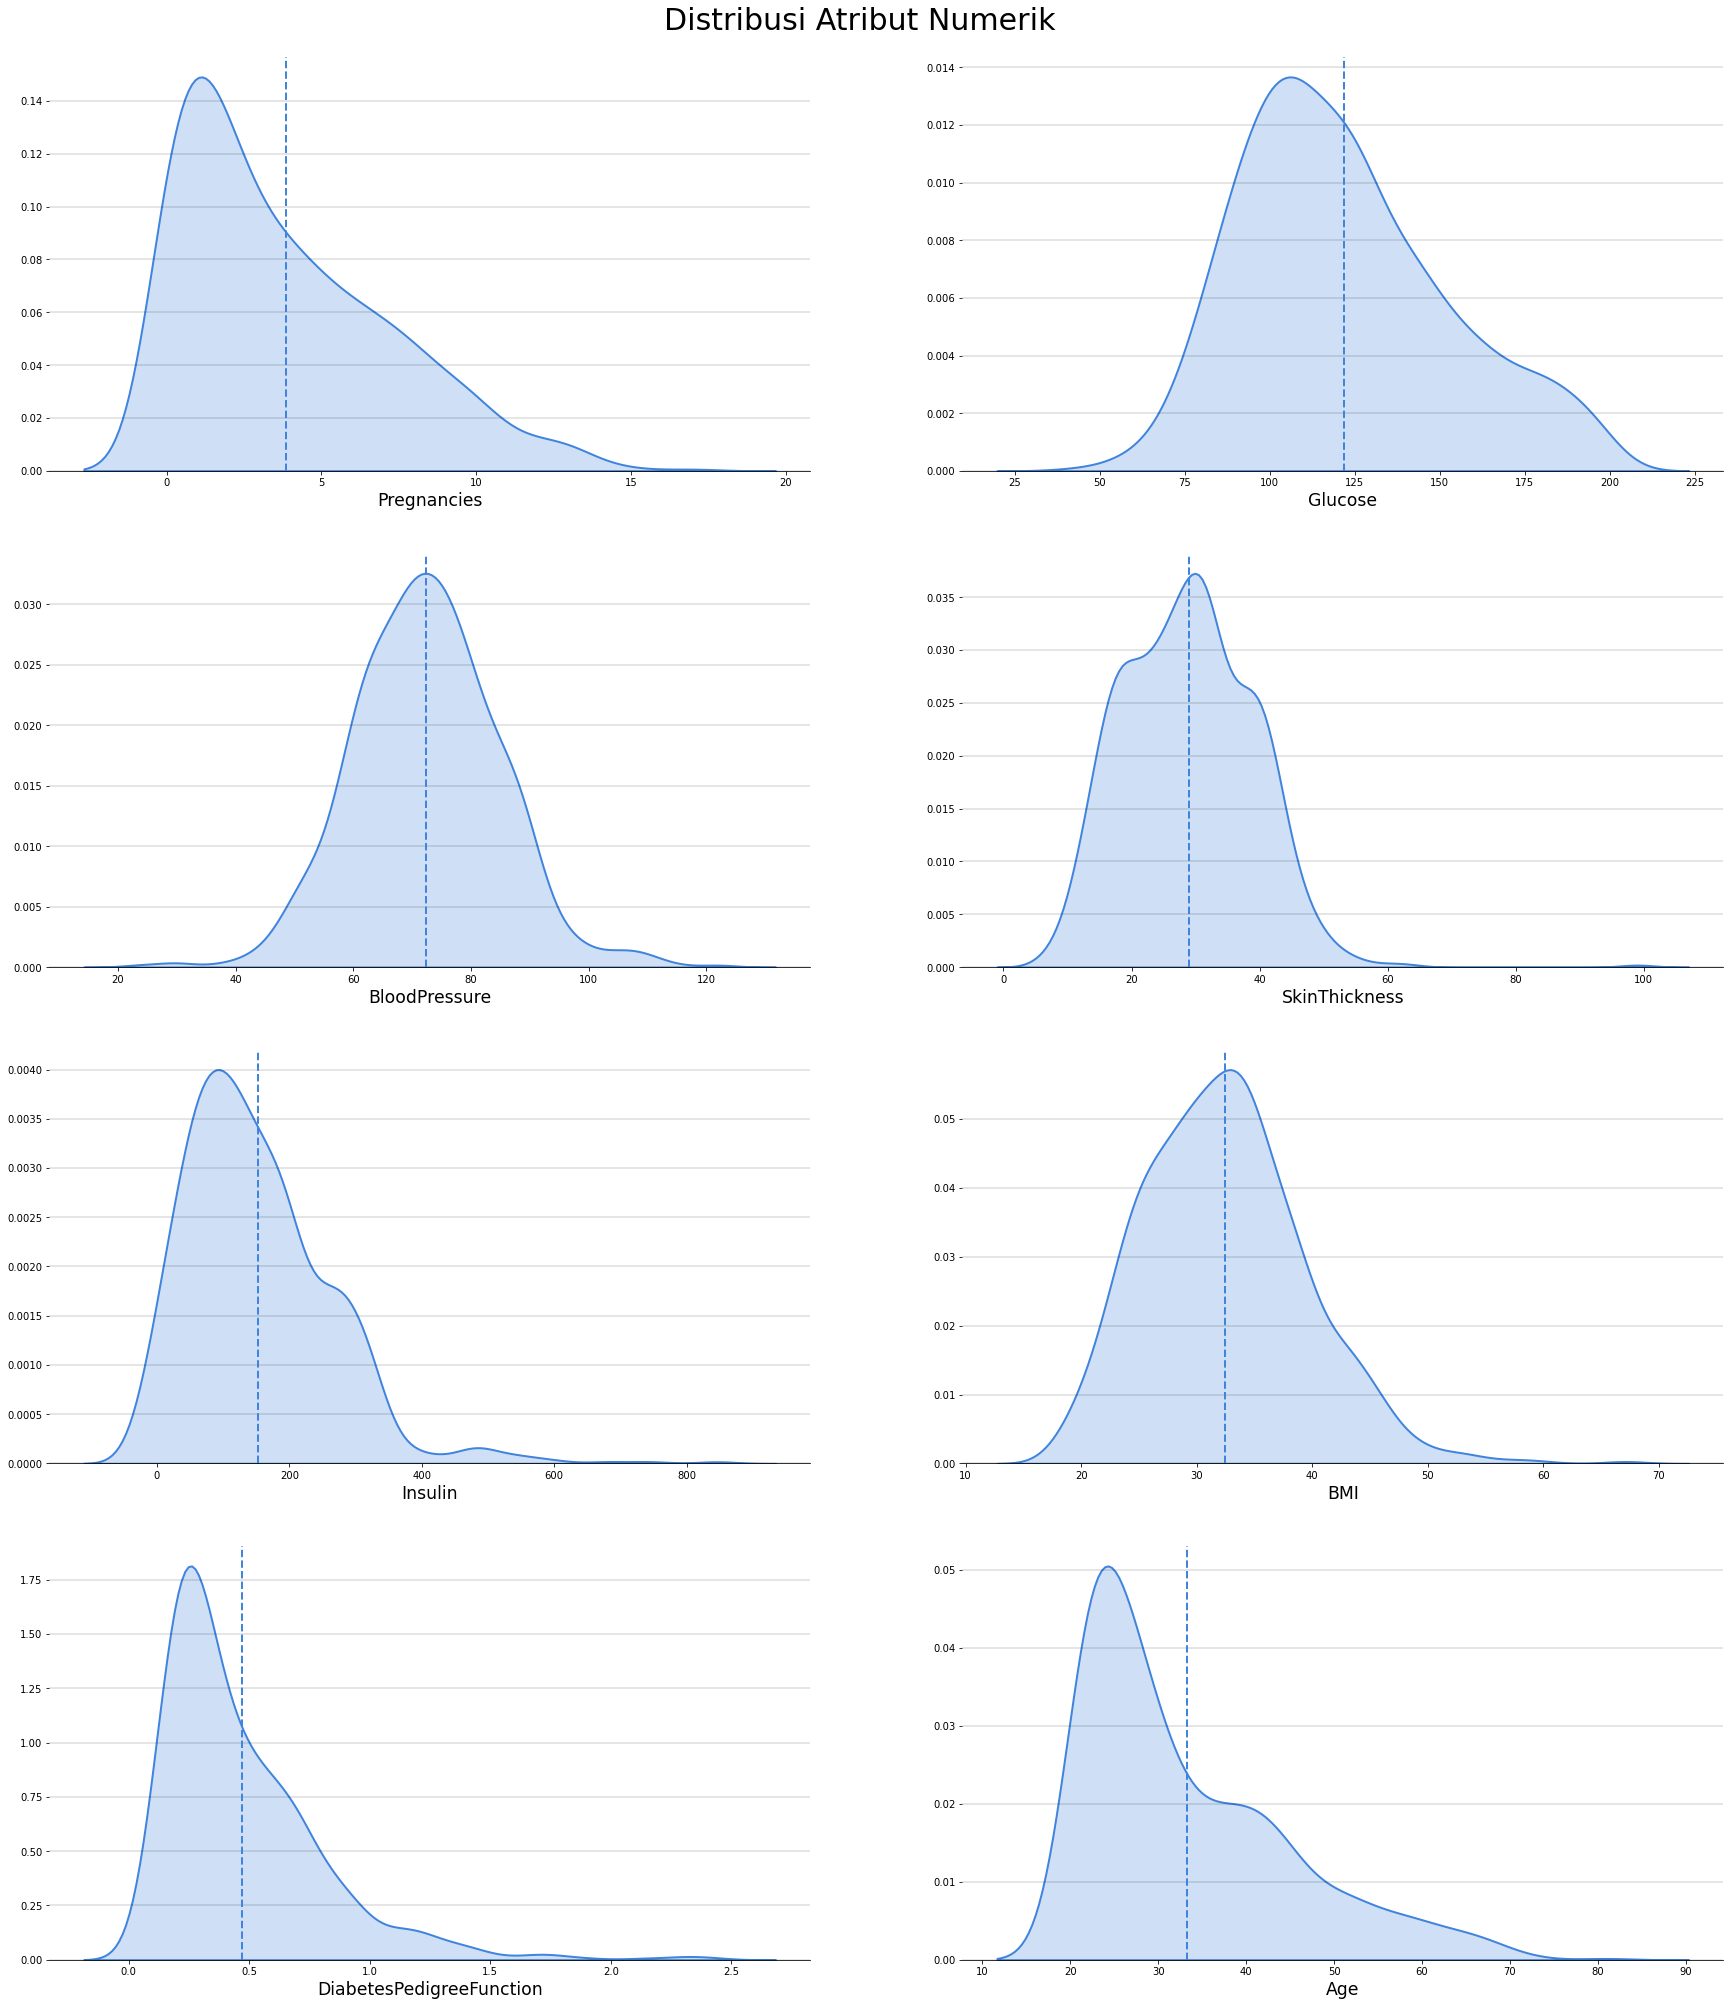

In [9]:
# Functions
def set_style(ax, left=True, bottom=False, axis_grid="y"):
    sns.despine(ax=ax, left=left, bottom=bottom)
    ax.grid(axis=axis_grid, linewidth=0.2, color="black")

def kde(data, column, ax, color=None, meanline_color=None, hue=None, hue_colors=None, title=None):

    sns.kdeplot(data=data, x=column, ax=ax,
        fill=True, linewidth=2, color=color, hue=hue, palette=hue_colors)
    
    if not hue:
        ax.axvline(np.mean(data[column]), linestyle='--', color=meanline_color, linewidth=2)
    else:
        for i, value in enumerate(data[hue].unique()):
            ax.axvline(np.mean(data[data[hue] == value][column]), linestyle='--', linewidth=2, 
                       label=value, color=hue_colors[value])

    ax.set_ylabel("")

    set_style(ax)
    
color = "#4084DD"
hue_dict = {
    0: "#7A9E7E",
    1: "#BA3B54"
}

fig, axs = plt.subplots(4, 2, figsize=(30, 35))

for i, col in enumerate(data.columns.drop("Outcome")):
    ax = axs[i // 2][i % 2]

    kde(data, col, ax, color=color, meanline_color=color)
    ax.set_xlabel(col, fontsize="xx-large")

fig.suptitle("Distribusi Atribut Numerik", fontsize=30, y=0.90)

plt.show()

Analisis Grafik:
1. *Pregnancies, Insulin, DiabetesPedigreeFunction, Age* menujukkan grafik distribusi ke kanan.
2. Sedangkan *Glucose, BloodPressure, SkinThickness, BMI* menunjukkan distribusi normal.
3. Terlihat pada grafik bahwa usia pasien berkisar lebih dari 10 tahun hingga 90 tahun.

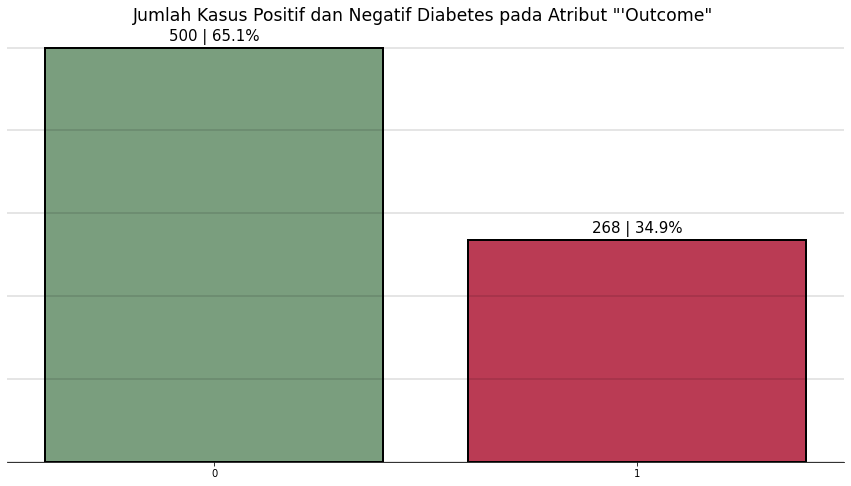

In [10]:
#Function
def count_values(data, col, ax, color=None):
    data = data[col].value_counts()

    data.index = data.index.map(str)

    ax.bar(x=data.index, height=data.values, 
        linewidth=2, edgecolor='black', color=color, alpha=1)

    labels = [f"{value} | {round(value / sum(data.values) * 100, 1)}%" for value in data.values]
    for container in ax.containers:
        ax.bar_label(container, labels=labels, padding=3, fontsize=15)

    ax.tick_params(axis='y', 
        left=False,  
        right=False, 
        labelleft=False
        )

    ax.set_title(f"Jumlah Kasus Positif dan Negatif Diabetes pada Atribut \"'{col}\" ", fontsize="xx-large")

    set_style(ax)

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

count_values(data, "Outcome", ax, color=hue_dict.values())

plt.show()

Distribusi dari atribut *Outcome* menunjukkan lebih banyak kasus negatif yaitu 500 pasien, tetapi bukan termasuk ketidakseimbangan yang ekstrem karena kasus positif sekitar 35 persen yaitu 268 pasien.

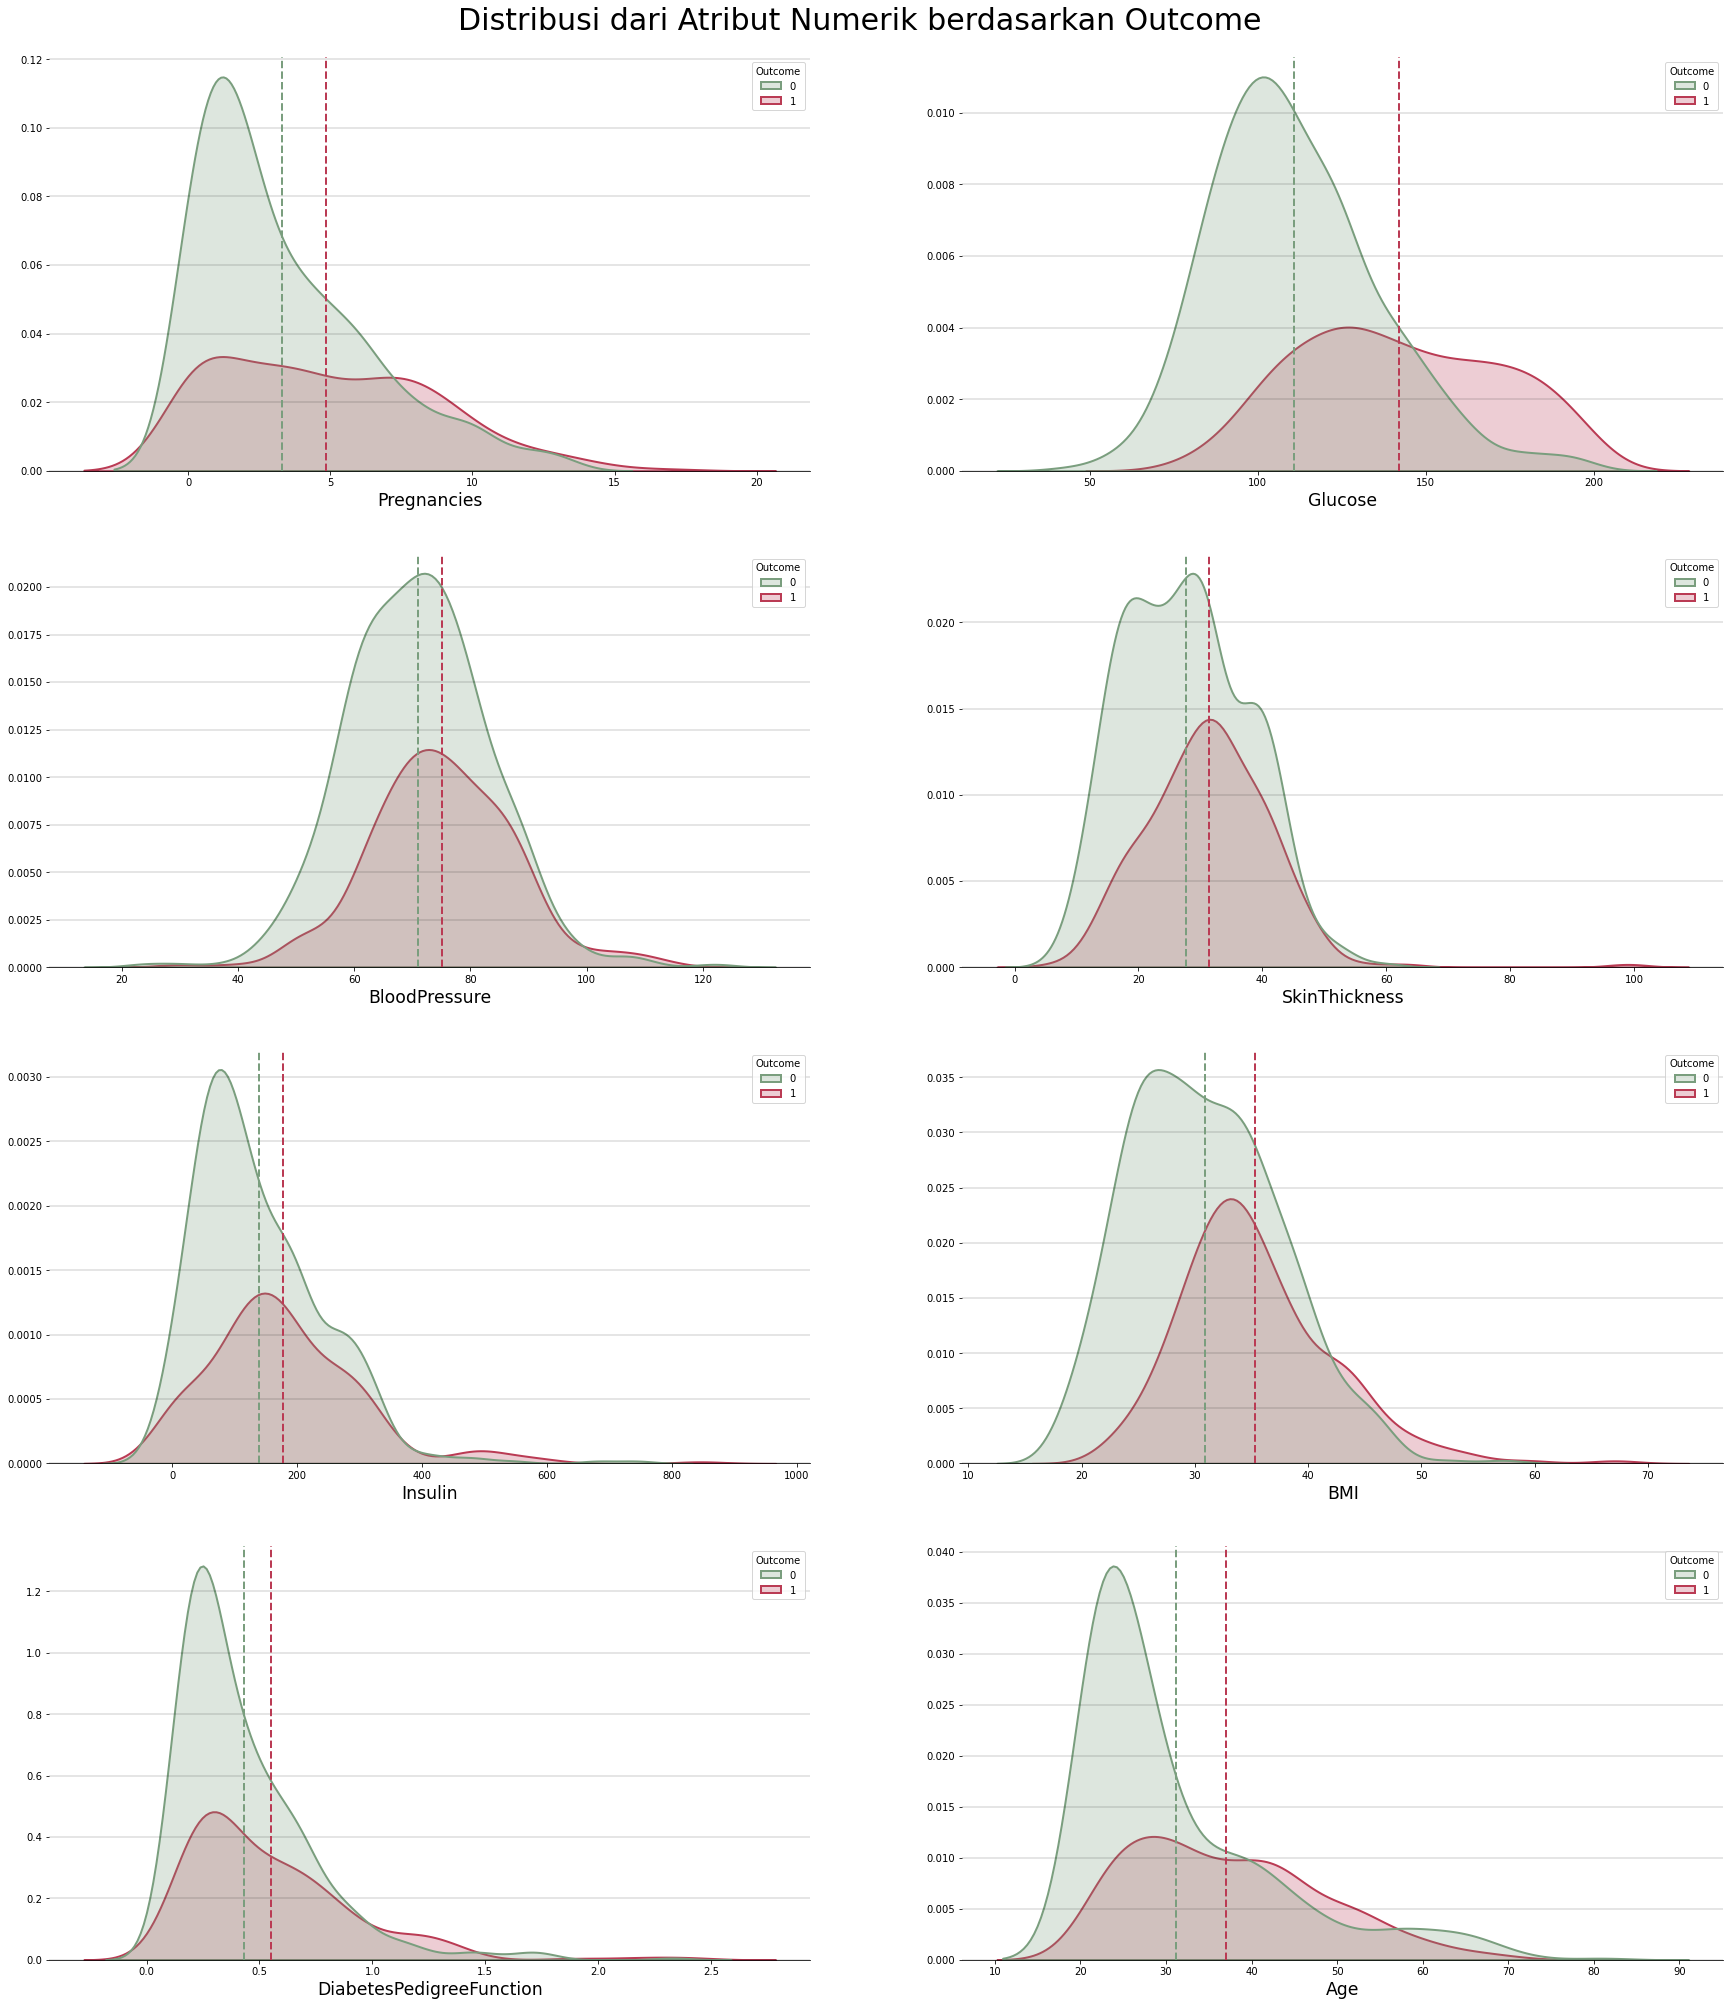

In [11]:
fig, axs = plt.subplots(4, 2, figsize=(30, 35))

for i, col in enumerate(data.columns.drop("Outcome")):
    ax = axs[i // 2][i % 2]

    kde(data, col, ax, hue="Outcome", hue_colors=hue_dict)
    ax.set_xlabel(col, fontsize="xx-large")

fig.suptitle("Distribusi dari Atribut Numerik berdasarkan Outcome", fontsize=30, y=0.90)

plt.show()

Analisis Grafik:
1. Pasien dengan diagnosis diabetes cenderung memiliki nilai yang lebih tinggi untuk semua atribut, terutama untuk *Glucose* dan *BMI*, di mana distribusi dan rata-rata kedua kelas paling berbeda.
2. Dari segi usia, perbedaan kedua atribut *Glucose* dan *BMI* juga sangat tinggi.
3. Terlihat bahwa memiliki semakin banyak kehamilan maka kemungkinan diabetes juga semakin tinggi.

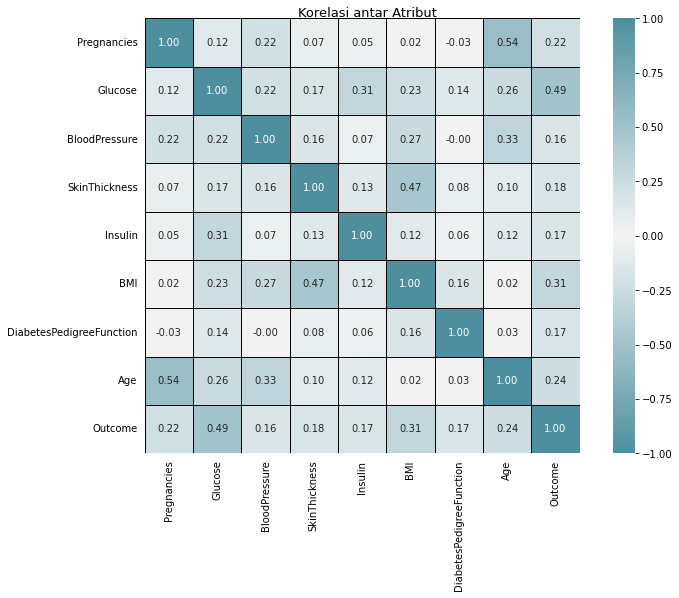

In [12]:
#Function
def correlation_matrix(data, ax, subset=None, palette=None):

    if not subset:
        subset = data.columns

    corr = data[subset].corr()


    sns.heatmap(corr, annot=True, ax=ax,
                cmap=palette, square=True, linewidth=.5, linecolor="black",
                vmin=-1, vmax=1, fmt=".2f")


    ax.tick_params(
        axis='both',          
        which='both',      
        bottom=False,      
        top=False,
        left=False,
        right=False
        )

palette = sns.diverging_palette(214, 214, s=70, l=56, as_cmap=True, sep=10)

fig, ax = plt.subplots(figsize=(12, 8))

correlation_matrix(data, ax, palette=palette)

fig.suptitle("Korelasi antar Atribut", fontsize=13, y=0.90)

plt.show()

Korelasi tertinggi dengan *Outcome* adalah atribut "Glucose", dengan nilai 0,49. Diikuti oleh *BMI* yaitu 0,31 dan *Age* yaitu 0,24 seperti pada grafik sebelumnya.

# *Modelling*

In [13]:
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

from tabulate import tabulate

X = data.drop(["Outcome", "Pregnancies", "BloodPressure", "SkinThickness", "Insulin", "DiabetesPedigreeFunction"], axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, 
    stratify=y, shuffle=True)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [14]:
#Function
def classifier_evaluation(y_true, y_predict, y_scores, label="Test"):

    accuracy = accuracy_score(y_true, y_predict)
    precision = precision_score(y_true, y_predict)
    recall  = recall_score(y_true, y_predict)
    f1 = f1_score(y_true, y_predict)
    auc = roc_auc_score(y_true, y_scores)

    header = ["Accuracy", "Precision", "Recall", "F1 Score", "Auc Score"]
    
    data = [accuracy, precision, recall, f1, auc]
    data = [round(el, 2) for el in data]

    table = [header, data]

    if label:
        print(f"{label} scores")

    print(tabulate(table, headers="firstrow", tablefmt="rst"))

def cv_and_evaluate(model, X_train, y_train, X_test, y_test, name=None):

    cv_score = cross_val_score(model, X_train, y_train, cv=4, n_jobs=-1)
    
    print(f"{name} CV Results \t Mean: {np.mean(cv_score)} \t Std: {np.std(cv_score)}")
    print(cv_score)

    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    
    try:
        y_test_score = model.predict_proba(X_test)[:, 1]
    except:
        y_test_score = model.decision_function(X_test)

    classifier_evaluation(y_test, y_test_pred, y_test_score)

## 1. DecisionTree

In [15]:
from sklearn.tree import DecisionTreeClassifier

waktuDT = time.time()
base = DecisionTreeClassifier(random_state=23, max_depth=3)

cv_and_evaluate(base, X_train, y_train, X_test, y_test, name="DecisionTree")
print('Durasi %f' %(time.time()-waktuDT),'detik') 
wDT = time.time()-waktuDT

DecisionTree CV Results 	 Mean: 0.7280956329463791 	 Std: 0.009008075771784297
[0.74074074 0.73134328 0.7238806  0.71641791]
Test scores
==========  ===========  ========  ==========  ===========
  Accuracy    Precision    Recall    F1 Score    Auc Score
==========  ===========  ========  ==========  ===========
      0.75         0.69      0.53         0.6         0.76
==========  ===========  ========  ==========  ===========
Durasi 10.277155 detik


## 2. AdaBost

In [16]:
from sklearn.ensemble import AdaBoostClassifier

waktuAB = time.time()
base = DecisionTreeClassifier(random_state=23, max_depth=3)
adb_clf = AdaBoostClassifier(base, random_state=23, n_estimators=50)

cv_and_evaluate(adb_clf, X_train, y_train, X_test, y_test, name="AdaBoost")
print('Durasi %f' %(time.time()-waktuAB),'detik') 
wAB = time.time()-waktuAB

AdaBoost CV Results 	 Mean: 0.7076561636263128 	 Std: 0.02292764377012046
[0.6962963  0.70149254 0.74626866 0.68656716]
Test scores
==========  ===========  ========  ==========  ===========
  Accuracy    Precision    Recall    F1 Score    Auc Score
==========  ===========  ========  ==========  ===========
      0.74         0.65      0.57        0.61         0.79
==========  ===========  ========  ==========  ===========
Durasi 0.881184 detik


## 3. LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression

waktuLR = time.time()
lr = LogisticRegression()

cv_and_evaluate(lr, X_train_scaled, y_train, X_test_scaled, y_test, name="LogisticRegression")
print('Durasi %f' %(time.time()-waktuLR),'detik') 
wAB = time.time()-waktuLR

LogisticRegression CV Results 	 Mean: 0.7597153123272526 	 Std: 0.042632981307217745
[0.79259259 0.7761194  0.78358209 0.68656716]
Test scores
==========  ===========  ========  ==========  ===========
  Accuracy    Precision    Recall    F1 Score    Auc Score
==========  ===========  ========  ==========  ===========
      0.79         0.74      0.62        0.67         0.85
==========  ===========  ========  ==========  ===========
Durasi 0.077020 detik


## 4. RandomForest 

In [18]:
from sklearn.ensemble import RandomForestClassifier

waktuRF = time.time()
rf = RandomForestClassifier(max_depth=8, random_state=23)

cv_and_evaluate(rf, X_train, y_train, X_test, y_test, name="Random Forest")
print('Durasi %f' %(time.time()-waktuRF),'detik') 
wRF = time.time()-waktuRF

Random Forest CV Results 	 Mean: 0.7578911000552792 	 Std: 0.028837378528487917
[0.77037037 0.79850746 0.73880597 0.7238806 ]
Test scores
==========  ===========  ========  ==========  ===========
  Accuracy    Precision    Recall    F1 Score    Auc Score
==========  ===========  ========  ==========  ===========
      0.76         0.68      0.62        0.65         0.83
==========  ===========  ========  ==========  ===========
Durasi 0.888556 detik


## 5. SVC

In [19]:
from sklearn.svm import SVC

waktuSVC = time.time()
svc = SVC(probability=True, random_state=23)

cv_and_evaluate(svc, X_train_scaled, y_train, X_test_scaled, y_test, name="SVC")
print('Durasi %f' %(time.time()-waktuSVC),'detik') 
wSVC = time.time()-waktuSVC

SVC CV Results 	 Mean: 0.7690574903261471 	 Std: 0.022041429881479255
[0.78518519 0.78358209 0.7761194  0.73134328]
Test scores
==========  ===========  ========  ==========  ===========
  Accuracy    Precision    Recall    F1 Score    Auc Score
==========  ===========  ========  ==========  ===========
      0.77         0.71      0.59        0.64         0.82
==========  ===========  ========  ==========  ===========
Durasi 0.340086 detik


## 6. GaussianNB

In [20]:
from sklearn.naive_bayes import GaussianNB

waktuGNB = time.time()
gnb = GaussianNB()

cv_and_evaluate(gnb, X_train_scaled, y_train, X_test_scaled, y_test, name="SVC")
print('Durasi %f' %(time.time()-waktuGNB),'detik') 
wSVC = time.time()-waktuGNB

SVC CV Results 	 Mean: 0.7559839690436705 	 Std: 0.030025754182813048
[0.79259259 0.73880597 0.7761194  0.71641791]
Test scores
==========  ===========  ========  ==========  ===========
  Accuracy    Precision    Recall    F1 Score    Auc Score
==========  ===========  ========  ==========  ===========
      0.79         0.73      0.63        0.68         0.84
==========  ===========  ========  ==========  ===========
Durasi 0.046931 detik


Hasil Analisis:
1. Dari keenam algoritma modelling yang digunakan, yang menghasilkan nilai akurasi paling tinggi yaitu *RandomForest* 
dengan akurasi sebesar 0,78.
2. Sedangkan running time paling cepat dari keenam algoritma yang digunakan yaitu dengan menggunakan *GaussianNaiveBayes*
dengan waktu 0,021027 detik.